# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_6021/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

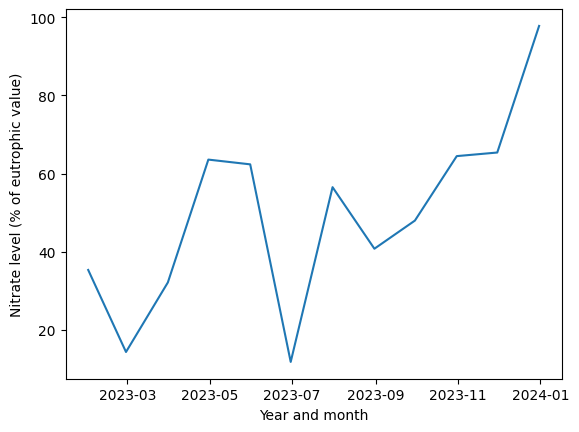

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_6021/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

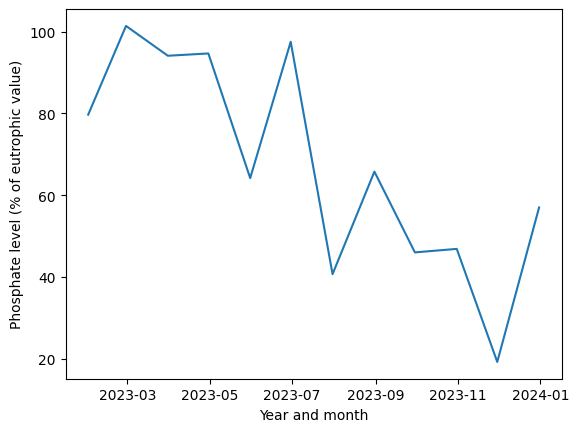

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

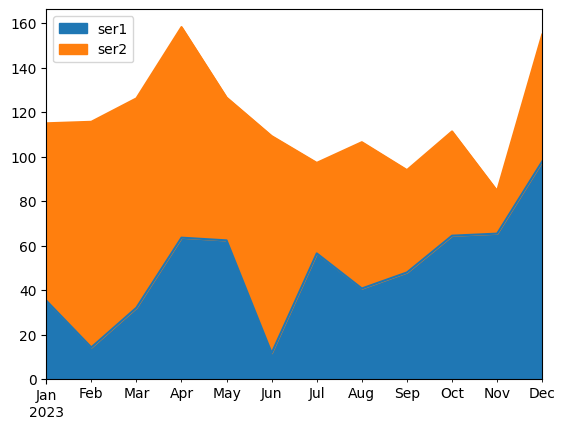

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

In [ ]:
#Advantages of showing as an area plot, as opposed to two separate line graphs: 
#The stacked or overlapping nature of area plots makes it easy to see how nitrate and phosphate levels relate to each other over time; 
#Area plot can show how much each contributes to the total water contamination.

#Disadvantages of showing as an area plot, as opposed to two separate line graphs:
#Harder to read the individual trend, especially phosphate level. 


#I will update the legend for the area plot to show which is nitrate level and which is phosphate level.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [2]:
data = pd.read_csv('CVD_data.csv')

In [6]:
# t test--diabetes
summary = data.groupby('DIABDXY1_M18')['TOTTCHY1'].agg(
    Mean='mean',
    SD='std',  # Standard deviation
    Median='median',
    Q1=lambda x: x.quantile(0.25),  # 25th percentile (Q1)
    Q3=lambda x: x.quantile(0.75)   # 75th percentile (Q3)
)
print(summary)

import scipy.stats as stats
group_wd = data[data["DIABDXY1_M18"] == 1]["TOTTCHY1"]
group_wod = data[data["DIABDXY1_M18"] == 2]["TOTTCHY1"]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_wd, group_wod)
print(t_stat, p_value)

                      Mean            SD  Median       Q1        Q3
DIABDXY1_M18                                                       
1.0           37018.153020  83947.140986  8463.0  2156.00  28944.00
2.0           15007.322673  53129.158329  2512.0   530.25   9225.25
9.862763389143696 8.646702206062119e-23


In [7]:
# t test--angina
summary = data.groupby('ANGIDXY1')['TOTTCHY1'].agg(
    Mean='mean',
    SD='std',  # Standard deviation
    Median='median',
    Q1=lambda x: x.quantile(0.25),  # 25th percentile (Q1)
    Q3=lambda x: x.quantile(0.75)   # 75th percentile (Q3)
)
print(summary)

group_wan = data[data["ANGIDXY1"] == 1]["TOTTCHY1"]
group_woan = data[data["ANGIDXY1"] == 2]["TOTTCHY1"]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_wan, group_woan)
print(t_stat, p_value)

                  Mean            SD   Median      Q1       Q3
ANGIDXY1                                                      
1.0       44795.000000  82896.867394  15864.0  3443.0  34565.0
2.0       19396.132281  57493.047565   3608.5   724.5  12416.0
4.749011617823813 2.096594154108711e-06


In [8]:
# t test--CHD
summary = data.groupby('CHDDXY1')['TOTTCHY1'].agg(
    Mean='mean',
    SD='std',  # Standard deviation
    Median='median',
    Q1=lambda x: x.quantile(0.25),  # 25th percentile (Q1)
    Q3=lambda x: x.quantile(0.75)   # 75th percentile (Q3)
)
print(summary)

group_wchd = data[data["CHDDXY1"] == 1]["TOTTCHY1"]
group_wochd = data[data["CHDDXY1"] == 2]["TOTTCHY1"]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_wchd, group_wochd)
print(t_stat, p_value)

                 Mean             SD   Median       Q1        Q3
CHDDXY1                                                         
1.0      53425.942529  118661.692366  14407.0  3948.75  45545.75
2.0      17668.896132   50888.389588   3383.0   678.00  11529.00
11.195690961160896 8.816826171889293e-29


In [9]:
# t test--HA
summary = data.groupby('MIDXY1')['TOTTCHY1'].agg(
    Mean='mean',
    SD='std',  # Standard deviation
    Median='median',
    Q1=lambda x: x.quantile(0.25),  # 25th percentile (Q1)
    Q3=lambda x: x.quantile(0.75)   # 75th percentile (Q3)
)
print(summary)

group_wha = data[data["MIDXY1"] == 1]["TOTTCHY1"]
group_woha = data[data["MIDXY1"] == 2]["TOTTCHY1"]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_wha, group_woha)
print(t_stat, p_value)

                Mean             SD   Median      Q1       Q3
MIDXY1                                                       
1.0     55492.291498  100943.464491  17889.0  5421.5  54549.5
2.0     18271.153743   54891.715140   3435.0   692.0  11718.0
9.893373397793333 6.932256413938721e-23


In [19]:
#- Find correlations between pairs of variables (age at 2021 survey, age at diabetes diagnosis, and total medical charges in 2021 and 2022).
data1 = data[['AGEY1X', 'DIABAGY1', 'TOTTCHY1', 'TOTTCHY2', 'DIABDXY1_M18']]
data1 = data1[data1['DIABDXY1_M18']==1]
data1['DIAGYEAR'] = data1['AGEY1X'] - data1['DIABAGY1']
data1[data1['AGEY1X'] < 0] = np.nan
data1[data1['DIABAGY1'] < 0] = np.nan

print("Correlations:", data1.corr())

Correlations:                 AGEY1X  DIABAGY1  TOTTCHY1  TOTTCHY2  DIABDXY1_M18  DIAGYEAR
AGEY1X        1.000000  0.681152  0.075803  0.113893           NaN  0.268832
DIABAGY1      0.681152  1.000000  0.049270  0.032150           NaN -0.522075
TOTTCHY1      0.075803  0.049270  1.000000  0.264506           NaN  0.023487
TOTTCHY2      0.113893  0.032150  0.264506  1.000000           NaN  0.090382
DIABDXY1_M18       NaN       NaN       NaN       NaN           NaN       NaN
DIAGYEAR      0.268832 -0.522075  0.023487  0.090382           NaN  1.000000


<Axes: xlabel='DIABAGY1', ylabel='DIAGYEAR'>

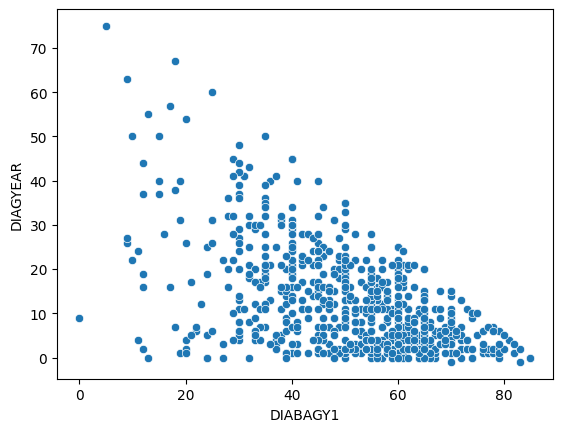

In [20]:
#- Draw scatterplots age at diabetes diagnosis and time since diagnosis.
sns.scatterplot(x = data1['DIABAGY1'], y = data1['DIAGYEAR'])

<Axes: xlabel='TOTTCHY1', ylabel='TOTTCHY2'>

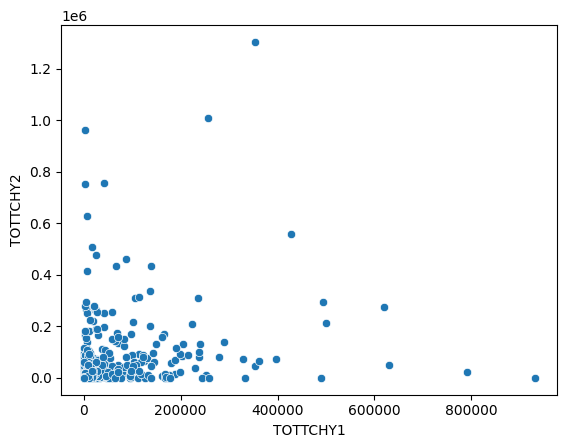

In [17]:
#- Draw scatterplots of total medical charges in 2021 and 2022.
sns.scatterplot(x = data1['TOTTCHY1'], y = data1['TOTTCHY2'])

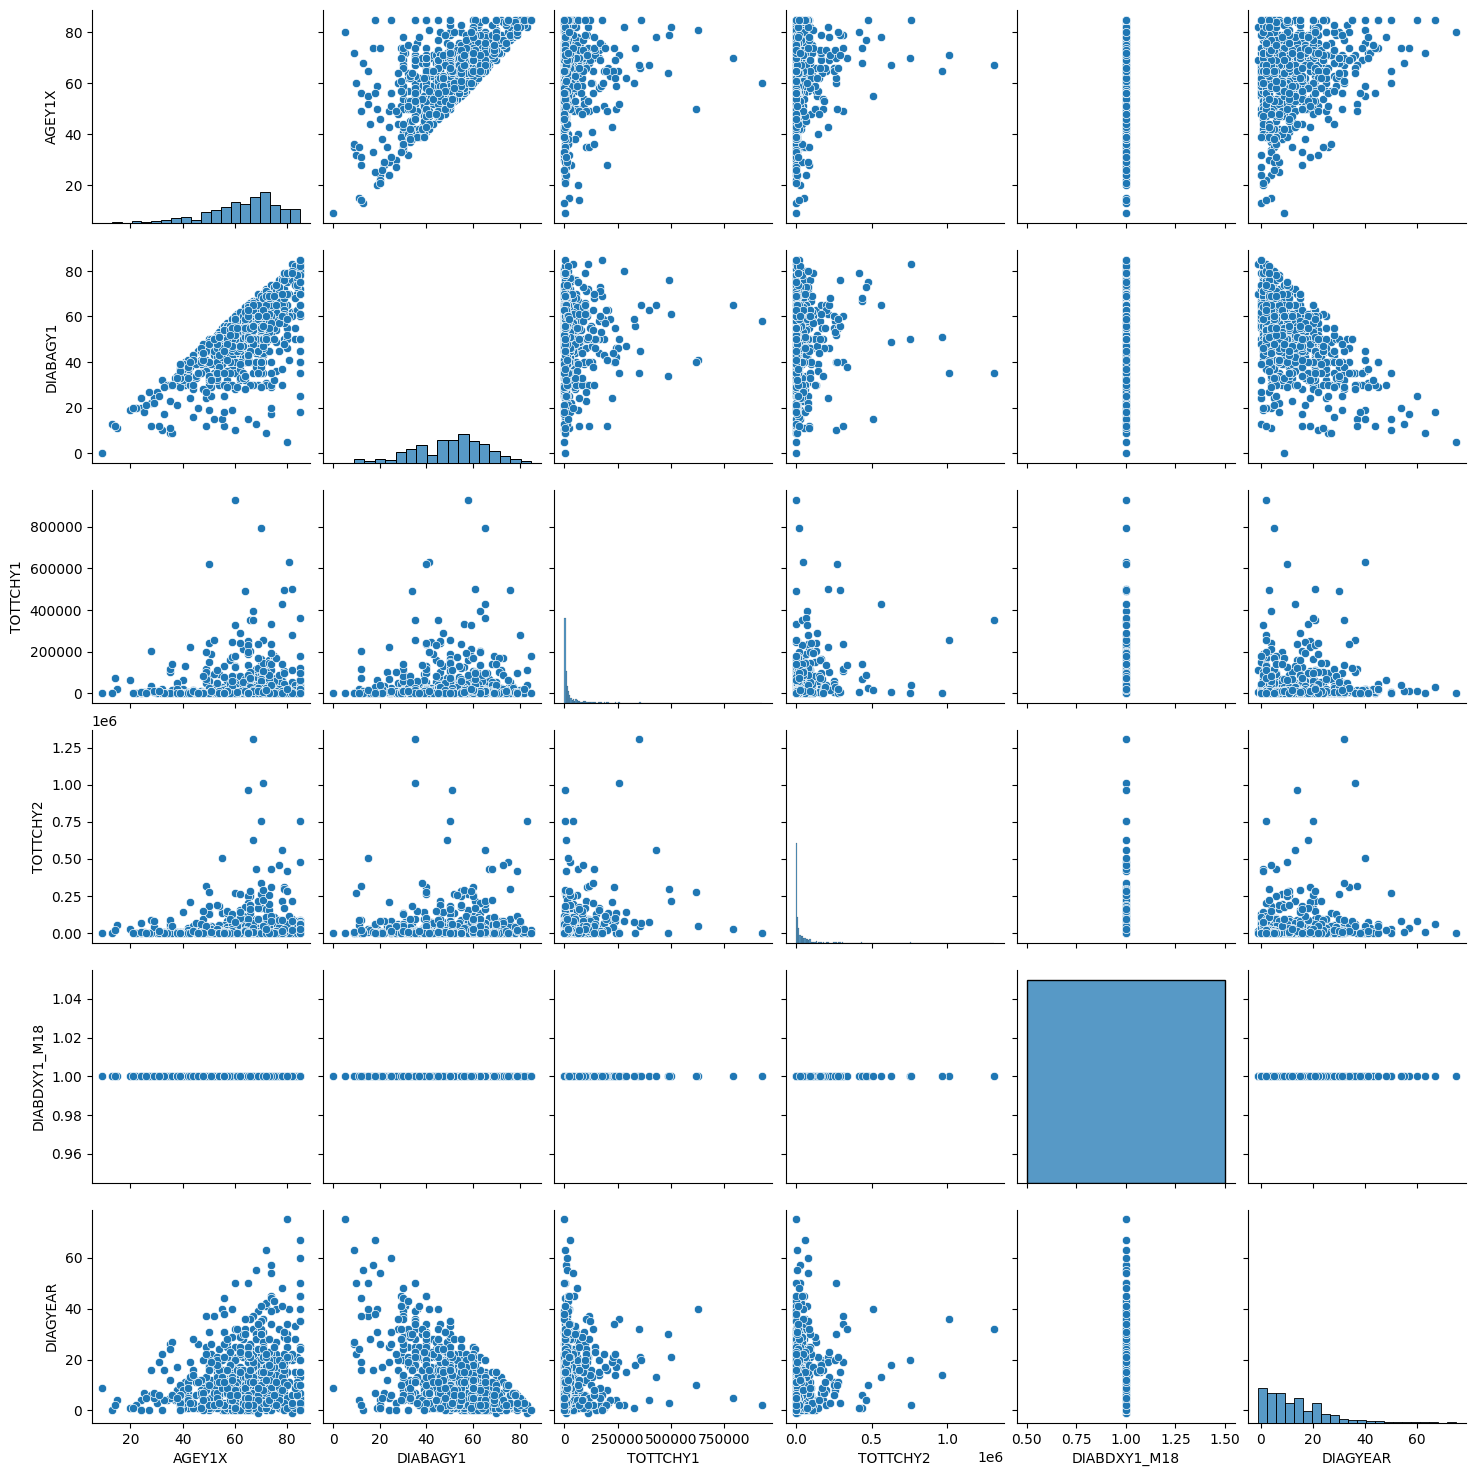

In [21]:
#- Draw pairplots.
sns.pairplot(data1)

In [ ]:
#- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

#Only two time points (2021 vs. 2022) are available, so time series plot can't be generated.

In [ ]:
# Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!
# We did not see a trend in years since diabetes diagnosis and total medicare spending in 2021/2022. The data is usable. 

# Do you see any outliers?  (Data points that are far from the rest of the data).
#There are outliers who spent a much greater amount ot of money in medical services in 2021 and/or 2022. 

# Are any data items highly correlated with each other, suggesting that they are redundant?
# No data items checked so far are highly correlated with each other. 

# For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?
#Only two time points (2021 vs. 2022) are available, so time series plot can't be generated.

# Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)
#Confounding variables between year since diagnosis and medical spend may include health insurance type, household income, and location. 

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

/tmp/ipykernel_2365/102656435.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


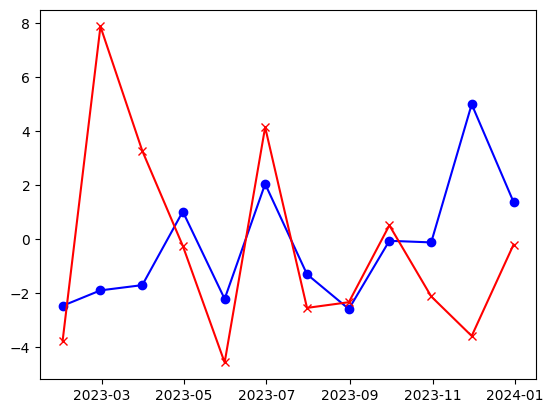

In [26]:
numdates = 12
time_series1 = np.random.random(size = numdates) * 0.01 + np.random.normal(size = numdates) * 2
time_series2 = np.random.random(size = numdates) * 0.01 + np.random.normal(size = numdates) * 3
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')

import matplotlib.pyplot as plt
plt.plot(datearray, time_series1, label='Time series 1', marker='o', color='blue')
plt.plot(datearray, time_series2, label='Time series 2', marker='x', color='red')